# Exemplo 1: Decision tree

In [3]:
# Imports
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


- Dados do Kaggle: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

In [4]:
df = pd.read_csv("datasets/diabetes.csv")
df.columns = df.columns.str.lower()

In [5]:
df.head()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


- Nomeando os tipos de variáveis:

In [6]:
#split dataset in features and target variable
feature_cols = ['pregnancies', 'insulin', 'bmi', 'age','glucose','bloodpressure','diabetespedigreefunction']
X = df[feature_cols] # Features
y = df.outcome # Target variable


In [7]:
X

,pregnancies,insulin,bmi,age,glucose,bloodpressure,diabetespedigreefunction
0,6,0,33.6,50,148,72,0.627
1,1,0,26.6,31,85,66,0.351
2,8,0,23.3,32,183,64,0.672
3,1,94,28.1,21,89,66,0.167
4,0,168,43.1,33,137,40,2.288
...,...,...,...,...,...,...,...
763,10,180,32.9,63,101,76,0.171
764,2,0,36.8,27,122,70,0.340
765,5,112,26.2,30,121,72,0.245
766,1,0,30.1,47,126,60,0.349


In [8]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: outcome, Length: 768, dtype: int64

- Dividindo em treino e teste:

In [9]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test


- Construindo o modelo de árvore de decisão

In [10]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


- Avaliando o modelo:

In [11]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.70995670995671


- A acurácia pode ser melhorada a partir da modificação de hiperparâmetros.

### Visualização da árvore

In [26]:
from sklearn import tree
import pydotplus
import matplotlib.pyplot as plt

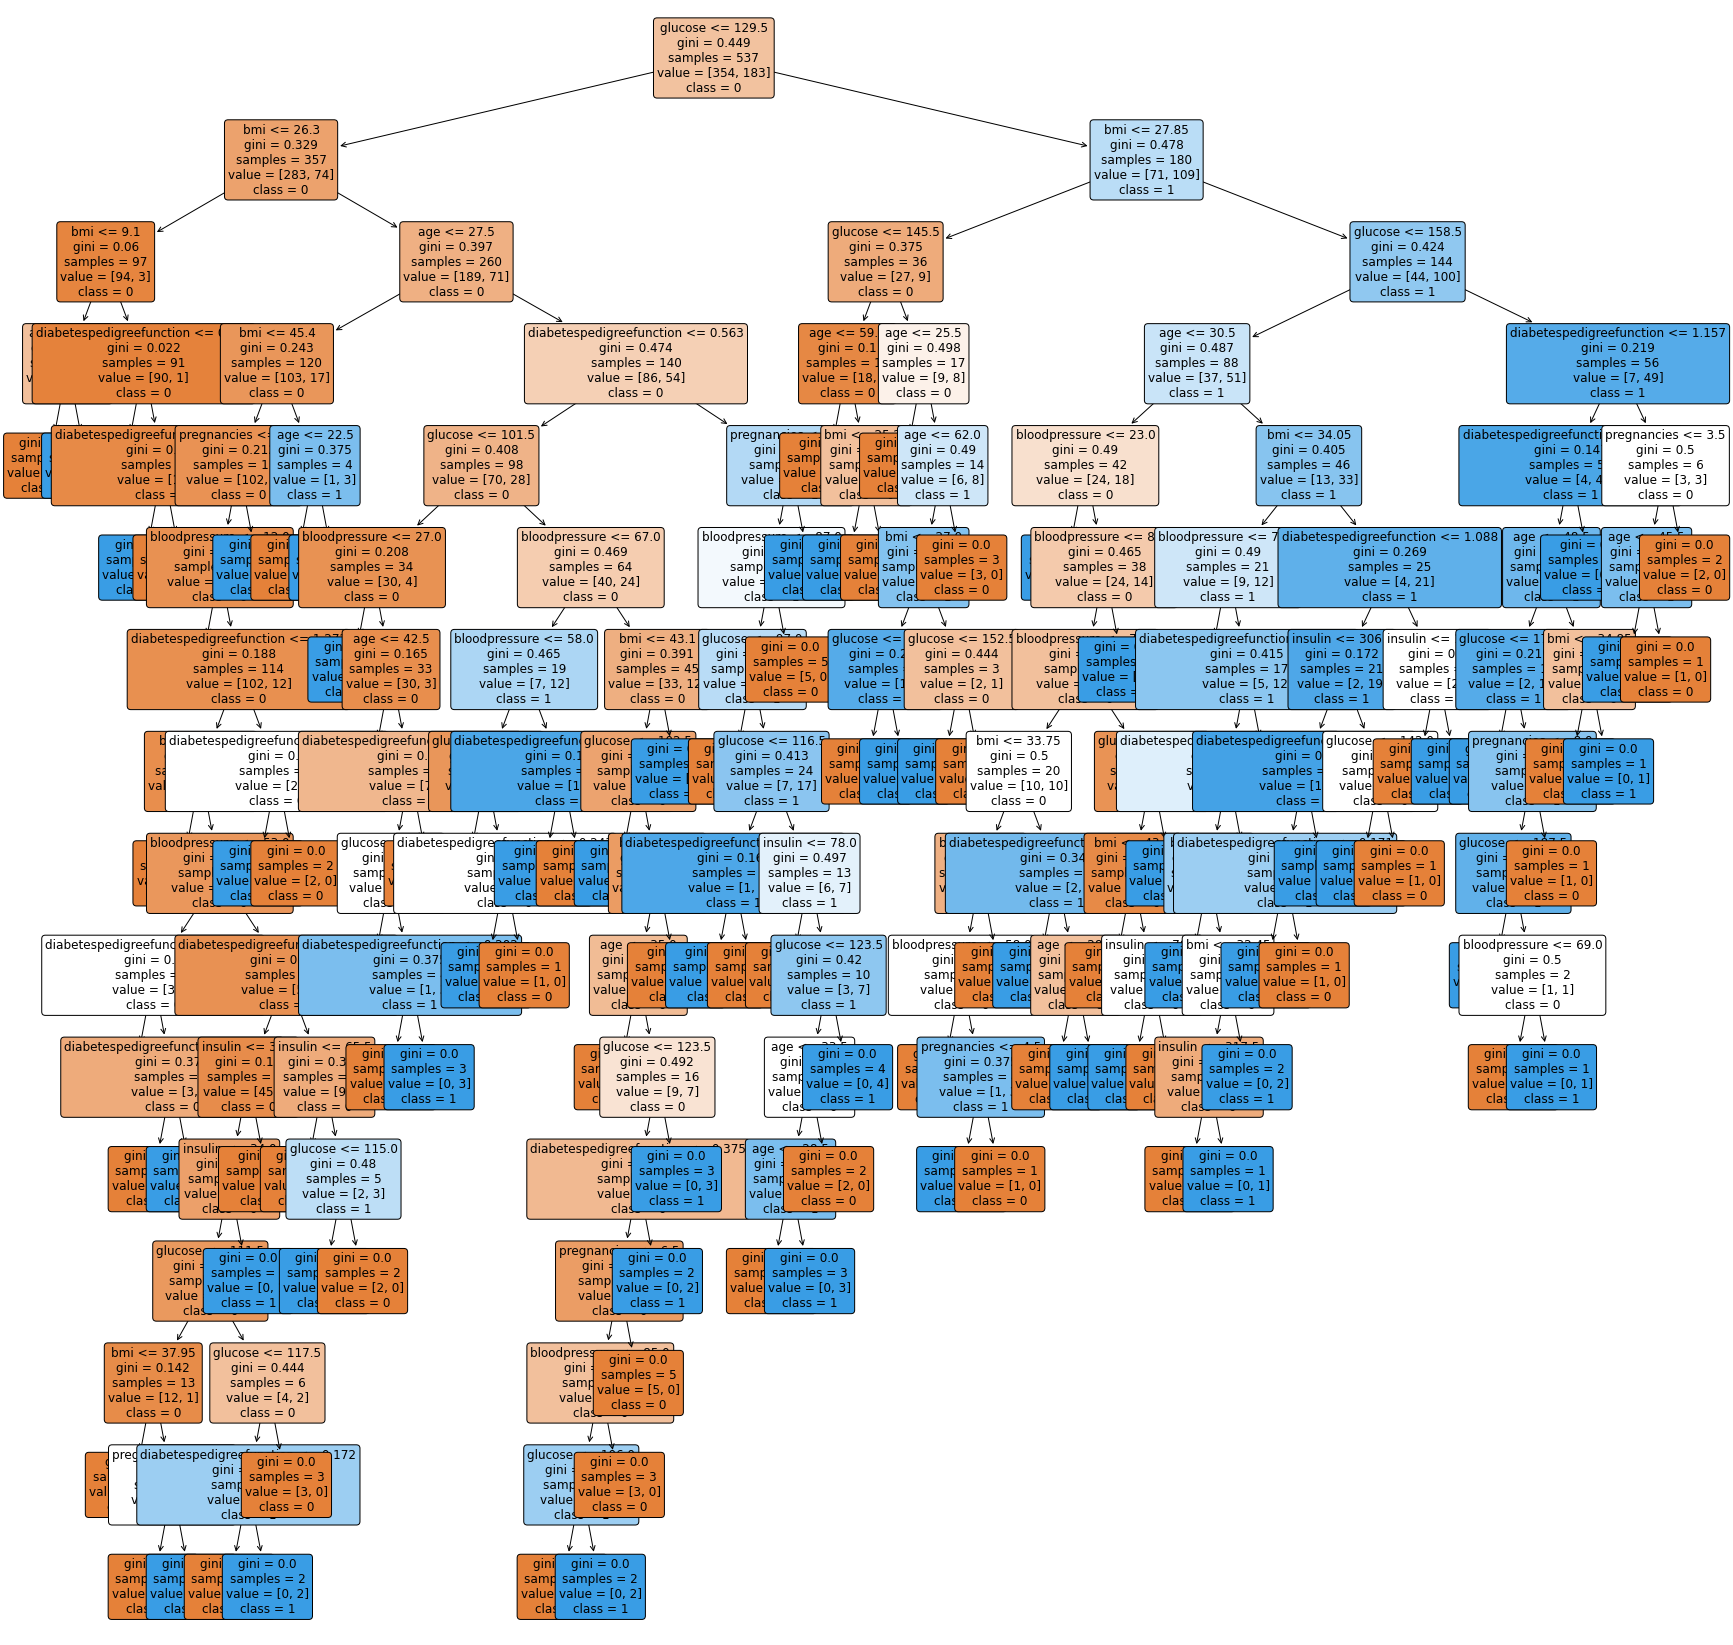

In [30]:
plt.figure(figsize=(30, 30))
tree.plot_tree(clf, 
               filled=True, rounded=True, 
               feature_names = X_train.columns,
               class_names = ['0','1'],
               fontsize=12)
plt.show()

- Quais hiperparâmetros podemos variar?